In [26]:
import pandas as pd
import numpy as np
import os
from os.path import join, exists
import json
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import (
    matthews_corrcoef,
    balanced_accuracy_score,
    f1_score,
    average_precision_score,
)
from sklearn.metrics import precision_score, recall_score

In [3]:
# os.listdir("outputs/ResAMR/embdim512_DRIAMS-B_random_sp0_results")


In [4]:
# template = "embdim512_DRIAMS-{}_{}_sp{}_results"
template = "noCNN_emb512_DRIAMS-{}_{}_sp{}_results"

datasets = ["A", "B", "C", "D"]
splits = ["random", "partitioned"]
sp_dims = [0]

In [19]:
metrics_df = []

for dset in datasets:
    for sp in splits:
        for dim in sp_dims:


            for i in range(5):
                try:
                    with open(join("outputs/ResAMR", template.format(dset, sp, dim), f"test_metrics_{i}.json"), "r") as f:
                        met = json.load(f)
                    met["dataset"] = dset
                    met["split"] = sp
                    met["seed"]=i
                    # met["species_embedding_dim"]=dim
                    metrics_df.append(met)
                except:
                    continue
    
metrics_df = pd.DataFrame(metrics_df)
metrics_df = metrics_df.drop(["test_loss", "seed"], axis=1)
metrics_df

,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,dataset,split
0,0.797452,0.905410,0.837694,0.910368,0.822643,0.858508,A,random
1,0.817554,0.904110,0.852409,0.920029,0.869181,0.840926,A,random
2,0.801275,0.887048,0.836842,0.914834,0.881153,0.801867,A,random
3,0.808137,0.895492,0.843595,0.913120,0.872547,0.821838,A,random
4,0.815735,0.891724,0.848011,0.924749,0.899784,0.806647,A,random
5,0.256952,0.618107,0.345141,0.417013,0.424378,0.328231,A,partitioned
6,0.300119,0.647142,0.398548,0.435449,0.435657,0.404570,A,partitioned
7,0.317792,0.675887,0.427888,0.444770,0.400629,0.505671,A,partitioned
8,0.238007,0.619570,0.345660,0.373678,0.377637,0.360308,A,partitioned
9,0.287453,0.649472,0.406990,0.424746,0.412047,0.441950,A,partitioned


In [20]:
mean_df = metrics_df.groupby(["split", "dataset"]).mean()
mean_df.columns = [c+"_average" for c in mean_df.columns]
std_df = metrics_df.groupby(["split", "dataset"]).std()
std_df.columns = [c+"_std" for c in std_df.columns]
std_df
joined_df = pd.merge(mean_df, std_df, left_index=True, right_index=True)
joined_df

test_mcc_average  test_balanced_accuracy_average  \
split       dataset                                                     
partitioned A                0.280065                        0.642035   
            B                0.393903                        0.698721   
            C                0.391991                        0.687139   
            D                0.468280                        0.721509   
random      A                0.808031                        0.896757   
            B                0.785416                        0.898073   
            C                0.808830                        0.894782   
            D                0.636964                        0.820910   

                     test_f1_average  test_AUPRC_average  \
split       dataset                                        
partitioned A               0.384846            0.419131   
            B               0.494150            0.539931   
            C               0.503798            0.552541   
            D               0.563474            0.633910   
random      A               0.843710            0.916620   
            B               0.818723            0.873584   
            C               0.852366            0.920312   
            D               0.686239            0.757732   

                     test_precision_average  test_recall_average  \
split       dataset                                                
partitioned A                      0.410070             0.408146   
            B                      0.526650             0.509506   
            C                      0.573762             0.485838   
            D                      0.624414             0.529167   
random      A                      0.869062             0.825957   
            B                      0.810404             0.835774   
            C                      0.886860             0.824938   
            D                      0.691983             0.693467   

                     test_mcc_std  test_balanced_accuracy_std  test_f1_std  \
split       dataset                                                          
partitioned A            0.032339                    0.024003     0.037559   
            B            0.032816                    0.024547     0.032697   
            C            0.000899                    0.016124     0.013559   
            D            0.045281                    0.026120     0.038930   
random      A            0.008769                    0.007908     0.006663   
            B            0.021551                    0.005088     0.017961   
            C            0.017744                    0.014724     0.016177   
            D            0.012156                    0.005920     0.007886   

                     test_AUPRC_std  test_precision_std  test_recall_std  
split       dataset                                                       
partitioned A              0.027503            0.022385         0.069537  
            B              0.035704            0.026417         0.062296  
            C              0.033401            0.054232         0.064197  
            D              0.054034            0.051051         0.054173  
random      A              0.005750            0.028535         0.023737  
            B              0.017075            0.036596         0.010577  
            C              0.009354            0.010903         0.033382  
            D              0.014583            0.037088         0.022796

In [21]:
metrics_order = ["mcc", "f1", "precision", "recall", "AUPRC", "balanced_accuracy"]
cols = []
for m in metrics_order:
    cols.append(f"test_{m}_average")
    cols.append(f"test_{m}_std")
    
joined_df[cols]

test_mcc_average  test_mcc_std  test_f1_average  \
split       dataset                                                    
partitioned A                0.280065      0.032339         0.384846   
            B                0.393903      0.032816         0.494150   
            C                0.391991      0.000899         0.503798   
            D                0.468280      0.045281         0.563474   
random      A                0.808031      0.008769         0.843710   
            B                0.785416      0.021551         0.818723   
            C                0.808830      0.017744         0.852366   
            D                0.636964      0.012156         0.686239   

                     test_f1_std  test_precision_average  test_precision_std  \
split       dataset                                                            
partitioned A           0.037559                0.410070            0.022385   
            B           0.032697                0.526650            0.026417   
            C           0.013559                0.573762            0.054232   
            D           0.038930                0.624414            0.051051   
random      A           0.006663                0.869062            0.028535   
            B           0.017961                0.810404            0.036596   
            C           0.016177                0.886860            0.010903   
            D           0.007886                0.691983            0.037088   

                     test_recall_average  test_recall_std  test_AUPRC_average  \
split       dataset                                                             
partitioned A                   0.408146         0.069537            0.419131   
            B                   0.509506         0.062296            0.539931   
            C                   0.485838         0.064197            0.552541   
            D                   0.529167         0.054173            0.633910   
random      A                   0.825957         0.023737            0.916620   
            B                   0.835774         0.010577            0.873584   
            C                   0.824938         0.033382            0.920312   
            D                   0.693467         0.022796            0.757732   

                     test_AUPRC_std  test_balanced_accuracy_average  \
split       dataset                                                   
partitioned A              0.027503                        0.642035   
            B              0.035704                        0.698721   
            C              0.033401                        0.687139   
            D              0.054034                        0.721509   
random      A              0.005750                        0.896757   
            B              0.017075                        0.898073   
            C              0.009354                        0.894782   
            D              0.014583                        0.820910   

                     test_balanced_accuracy_std  
split       dataset                              
partitioned A                          0.024003  
            B                          0.024547  
            C                          0.016124  
            D                          0.026120  
random      A                          0.007908  
            B                          0.005088  
            C                          0.014724  
            D                          0.005920

In [22]:
plot_df = pd.melt(metrics_df.reset_index(), id_vars=["dataset", "split"], value_vars=[c for c in metrics_df.columns if c.startswith("test")])
plot_df

,dataset,split,variable,value
0,A,random,test_mcc,0.797452
1,A,random,test_mcc,0.817554
2,A,random,test_mcc,0.801275
3,A,random,test_mcc,0.808137
4,A,random,test_mcc,0.815735
...,...,...,...,...
217,D,partitioned,test_recall,0.590441
218,D,partitioned,test_recall,0.571171
219,D,partitioned,test_recall,0.464645
220,D,partitioned,test_recall,0.535340


<AxesSubplot: xlabel='variable', ylabel='value'>

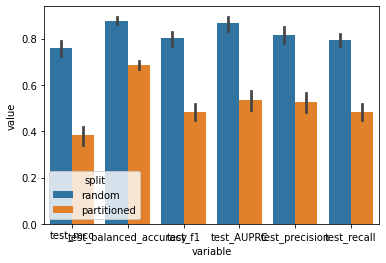

In [23]:
sns.barplot(data=plot_df, x="variable", y="value", hue="split")

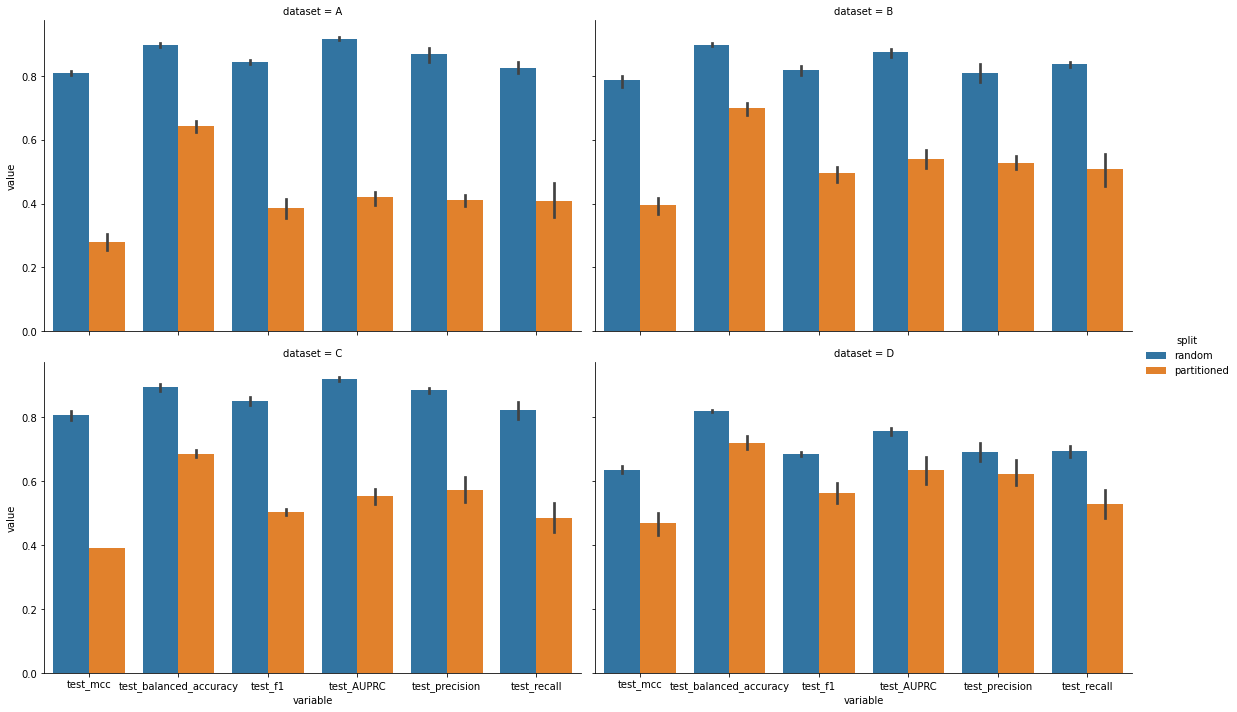

In [24]:
sns.catplot(
    data=plot_df, x="variable", y="value", hue="split", col="dataset", col_wrap=2,
    kind="bar", height=5, aspect=1.6,
)

In [25]:
variable_mapping = {
    "test_mcc": "MCC",
    "test_balanced_accuracy": "Balanced accuracy",
    "test_f1": "F1",
    "test_AUPRC": "AUPRC",
    "test_precision": "Precision",
    "test_recall": "Recall"
}
plot_df["variable"] = plot_df["variable"].map(variable_mapping)
plot_df["DRIAMS dataset"] = plot_df["dataset"]
plot_df

,dataset,split,variable,value,DRIAMS dataset
0,A,random,MCC,0.797452,A
1,A,random,MCC,0.817554,A
2,A,random,MCC,0.801275,A
3,A,random,MCC,0.808137,A
4,A,random,MCC,0.815735,A
...,...,...,...,...,...
217,D,partitioned,Recall,0.590441,D
218,D,partitioned,Recall,0.571171,D
219,D,partitioned,Recall,0.464645,D
220,D,partitioned,Recall,0.535340,D


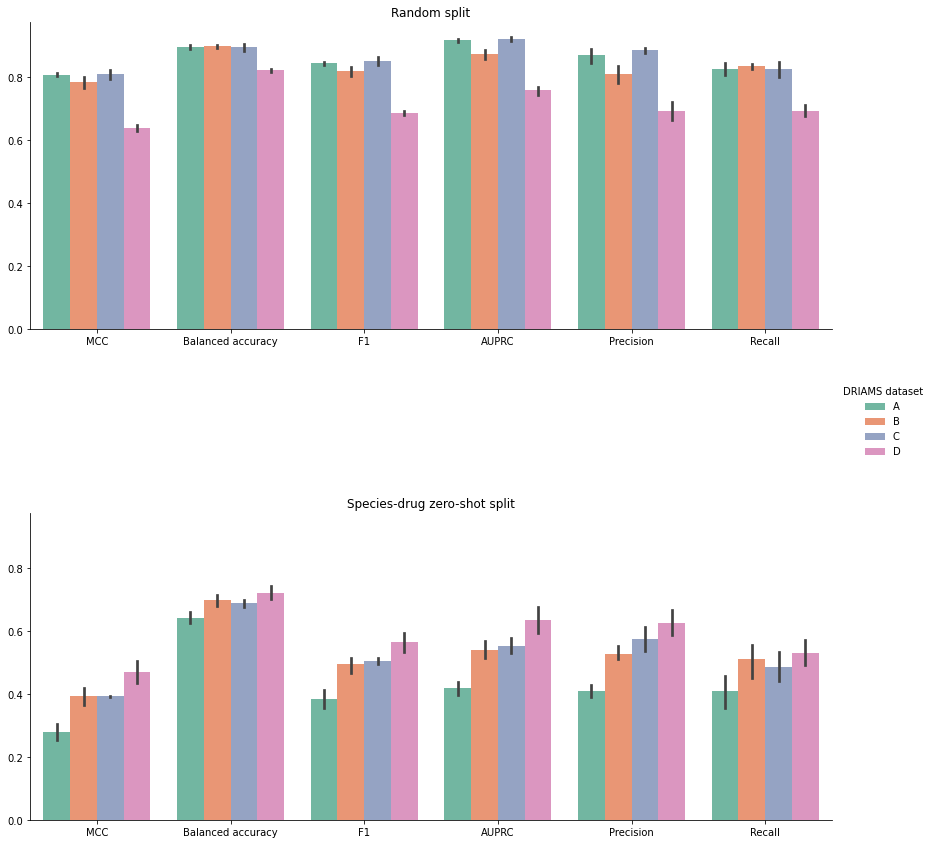

In [26]:
g = sns.catplot(
    data=plot_df, x="variable", y="value", row="split", hue="DRIAMS dataset",
    kind="bar", height=6, aspect=2, palette="Set2", sharex=False
)
axs = g.axes.flatten()

axs[0].set_title("Random split")
axs[0].set_ylabel("")
axs[0].set_xlabel("")

axs[1].set_title("Species-drug zero-shot split")
axs[1].set_ylabel("")
axs[1].set_xlabel("")

plt.subplots_adjust(hspace=0.6)

g.fig.savefig("outputs/plots/ResMLP_dataset_comparison.pdf", bbox_inches="tight")
plt.show()


In [16]:
g[0]

TypeError: 'FacetGrid' object is not subscriptable

# Drugs Zero Shot

In [19]:
joined_df

test_mcc_average  test_balanced_accuracy_average  \
split       dataset                                                     
partitioned A                0.280065                        0.642035   
            B                0.393903                        0.698721   
            C                0.391991                        0.687139   
            D                0.468280                        0.721509   
random      A                0.808031                        0.896757   
            B                0.785416                        0.898073   
            C                0.808830                        0.894782   
            D                0.636964                        0.820910   

                     test_f1_average  test_AUPRC_average  \
split       dataset                                        
partitioned A               0.384846            0.419131   
            B               0.494150            0.539931   
            C               0.503798            0.552541   
            D               0.563474            0.633910   
random      A               0.843710            0.916620   
            B               0.818723            0.873584   
            C               0.852366            0.920312   
            D               0.686239            0.757732   

                     test_precision_average  test_recall_average  \
split       dataset                                                
partitioned A                      0.410070             0.408146   
            B                      0.526650             0.509506   
            C                      0.573762             0.485838   
            D                      0.624414             0.529167   
random      A                      0.869062             0.825957   
            B                      0.810404             0.835774   
            C                      0.886860             0.824938   
            D                      0.691983             0.693467   

                     test_mcc_std  test_balanced_accuracy_std  test_f1_std  \
split       dataset                                                          
partitioned A            0.032339                    0.024003     0.037559   
            B            0.032816                    0.024547     0.032697   
            C            0.000899                    0.016124     0.013559   
            D            0.045281                    0.026120     0.038930   
random      A            0.008769                    0.007908     0.006663   
            B            0.021551                    0.005088     0.017961   
            C            0.017744                    0.014724     0.016177   
            D            0.012156                    0.005920     0.007886   

                     test_AUPRC_std  test_precision_std  test_recall_std  
split       dataset                                                       
partitioned A              0.027503            0.022385         0.069537  
            B              0.035704            0.026417         0.062296  
            C              0.033401            0.054232         0.064197  
            D              0.054034            0.051051         0.054173  
random      A              0.005750            0.028535         0.023737  
            B              0.017075            0.036596         0.010577  
            C              0.009354            0.010903         0.033382  
            D              0.014583            0.037088         0.022796

In [20]:
zs_df = pd.read_csv("outputs/ResMLP_zero_shot_metrics.csv")
zs_df.insert(0, "split", "drugs_zero_shot")#reset_index()
zs_df

,split,dataset,test_mcc_average,test_mcc_std,test_f1_average,test_f1_std,test_precision_average,test_precision_std,test_recall_average,test_recall_std,test_AUPRC_average,test_AUPRC_std,test_balanced_accuracy_average,test_balanced_accuracy_std
0,drugs_zero_shot,A,0.281093,0.240298,0.379570,0.255085,0.443204,0.320742,0.439870,0.287945,0.472825,0.292644,0.652252,0.128655
1,drugs_zero_shot,B,0.353169,0.279759,0.397460,0.277678,0.510088,0.363517,0.443787,0.309523,0.473135,0.314272,0.705559,0.152954
2,drugs_zero_shot,C,0.174801,0.281546,0.251471,0.298361,0.315627,0.362205,0.263973,0.311327,0.343128,0.347088,0.662351,0.254129
3,drugs_zero_shot,D,0.198087,0.217081,0.283299,0.227813,0.338227,0.313166,0.390202,0.295077,0.360113,0.306362,0.658522,0.162238


In [22]:
results_df = pd.concat((joined_df.reset_index(), zs_df)).set_index(["split", "dataset"])
results_df = results_df[cols]
results_df

test_mcc_average  test_mcc_std  test_f1_average  \
split           dataset                                                    
partitioned     A                0.280065      0.032339         0.384846   
                B                0.393903      0.032816         0.494150   
                C                0.391991      0.000899         0.503798   
                D                0.468280      0.045281         0.563474   
random          A                0.808031      0.008769         0.843710   
                B                0.785416      0.021551         0.818723   
                C                0.808830      0.017744         0.852366   
                D                0.636964      0.012156         0.686239   
drugs_zero_shot A                0.281093      0.240298         0.379570   
                B                0.353169      0.279759         0.397460   
                C                0.174801      0.281546         0.251471   
                D                0.198087      0.217081         0.283299   

                         test_f1_std  test_precision_average  \
split           dataset                                        
partitioned     A           0.037559                0.410070   
                B           0.032697                0.526650   
                C           0.013559                0.573762   
                D           0.038930                0.624414   
random          A           0.006663                0.869062   
                B           0.017961                0.810404   
                C           0.016177                0.886860   
                D           0.007886                0.691983   
drugs_zero_shot A           0.255085                0.443204   
                B           0.277678                0.510088   
                C           0.298361                0.315627   
                D           0.227813                0.338227   

                         test_precision_std  test_recall_average  \
split           dataset                                            
partitioned     A                  0.022385             0.408146   
                B                  0.026417             0.509506   
                C                  0.054232             0.485838   
                D                  0.051051             0.529167   
random          A                  0.028535             0.825957   
                B                  0.036596             0.835774   
                C                  0.010903             0.824938   
                D                  0.037088             0.693467   
drugs_zero_shot A                  0.320742             0.439870   
                B                  0.363517             0.443787   
                C                  0.362205             0.263973   
                D                  0.313166             0.390202   

                         test_recall_std  test_AUPRC_average  test_AUPRC_std  \
split           dataset                                                        
partitioned     A               0.069537            0.419131        0.027503   
                B               0.062296            0.539931        0.035704   
                C               0.064197            0.552541        0.033401   
                D               0.054173            0.633910        0.054034   
random          A               0.023737            0.916620        0.005750   
                B               0.010577            0.873584        0.017075   
                C               0.033382            0.920312        0.009354   
                D               0.022796            0.757732        0.014583   
drugs_zero_shot A               0.287945            0.472825        0.292644   
                B               0.309523            0.473135        0.314272   
                C               0.311327            0.343128        0.347088   
                D               0.295077            0.360113        0.

In [23]:
results_df.to_csv("outputs/aggregate_resuts/ResMLP_metrics.csv")

In [27]:
df_print = results_df[["test_AUPRC_average", "test_AUPRC_std", "test_balanced_accuracy_average", "test_balanced_accuracy_std",
            "test_mcc_average", "test_mcc_std"]]
df_print

test_AUPRC_average  test_AUPRC_std  \
split           dataset                                       
partitioned     A                  0.419131        0.027503   
                B                  0.539931        0.035704   
                C                  0.552541        0.033401   
                D                  0.633910        0.054034   
random          A                  0.916620        0.005750   
                B                  0.873584        0.017075   
                C                  0.920312        0.009354   
                D                  0.757732        0.014583   
drugs_zero_shot A                  0.472825        0.292644   
                B                  0.473135        0.314272   
                C                  0.343128        0.347088   
                D                  0.360113        0.306362   

                         test_balanced_accuracy_average  \
split           dataset                                   
partitioned     A                              0.642035   
                B                              0.698721   
                C                              0.687139   
                D                              0.721509   
random          A                              0.896757   
                B                              0.898073   
                C                              0.894782   
                D                              0.820910   
drugs_zero_shot A                              0.652252   
                B                              0.705559   
                C                              0.662351   
                D                              0.658522   

                         test_balanced_accuracy_std  test_mcc_average  \
split           dataset                                                 
partitioned     A                          0.024003          0.280065   
                B                          0.024547          0.393903   
                C                          0.016124          0.391991   
                D                          0.026120          0.468280   
random          A                          0.007908          0.808031   
                B                          0.005088          0.785416   
                C                          0.014724          0.808830   
                D                          0.005920          0.636964   
drugs_zero_shot A                          0.128655          0.281093   
                B                          0.152954          0.353169   
                C                          0.254129          0.174801   
                D                          0.162238          0.198087   

                         test_mcc_std  
split           dataset                
partitioned     A            0.032339  
                B            0.032816  
                C            0.000899  
                D            0.045281  
random          A            0.008769  
                B            0.021551  
                C            0.017744  
                D            0.012156  
drugs_zero_shot A            0.240298  
                B            0.279759  
                C            0.281546  
                D            0.217081

In [36]:
metrics = ["AUPRC", "balanced_accuracy", "mcc"]

for i, row in df_print.iterrows():
    
    print(i)
    for m in metrics:
        print("{:.2f} ({:.2f}) ".format(row[f"test_{m}_average"], row[f"test_{m}_std"]), end="")
        if m!="mcc":
            print(" & ", end="")
    print(" \\\ ")

('partitioned', 'A')
0.42 (0.03)  & 0.64 (0.02)  & 0.28 (0.03)  \\ 
('partitioned', 'B')
0.54 (0.04)  & 0.70 (0.02)  & 0.39 (0.03)  \\ 
('partitioned', 'C')
0.55 (0.03)  & 0.69 (0.02)  & 0.39 (0.00)  \\ 
('partitioned', 'D')
0.63 (0.05)  & 0.72 (0.03)  & 0.47 (0.05)  \\ 
('random', 'A')
0.92 (0.01)  & 0.90 (0.01)  & 0.81 (0.01)  \\ 
('random', 'B')
0.87 (0.02)  & 0.90 (0.01)  & 0.79 (0.02)  \\ 
('random', 'C')
0.92 (0.01)  & 0.89 (0.01)  & 0.81 (0.02)  \\ 
('random', 'D')
0.76 (0.01)  & 0.82 (0.01)  & 0.64 (0.01)  \\ 
('drugs_zero_shot', 'A')
0.47 (0.29)  & 0.65 (0.13)  & 0.28 (0.24)  \\ 
('drugs_zero_shot', 'B')
0.47 (0.31)  & 0.71 (0.15)  & 0.35 (0.28)  \\ 
('drugs_zero_shot', 'C')
0.34 (0.35)  & 0.66 (0.25)  & 0.17 (0.28)  \\ 
('drugs_zero_shot', 'D')
0.36 (0.31)  & 0.66 (0.16)  & 0.20 (0.22)  \\ 


# GNN

In [18]:
# template = "embdim512_DRIAMS-{}_{}_sp{}_results"
template = "noCNN_emb512_DRIAMS-{}_{}_sp0_results"

# datasets = ["A", "B", "C", "D"]
datasets = ["B", "C"]
splits = ["random"]
sp_dims = [0]

In [29]:
metrics_df = []

for dset in datasets:
    for sp in splits:
        # for dim in sp_dims:


        for i in range(10):
            try:
                test_set = pd.read_csv(join("../outputs/ResAMR_GNN", template.format(dset, sp), f"test_set_seed{i}.csv"))
            except:
                print("File ", join("../outputs/ResAMR_GNN", template.format(dset, sp), f"test_set_seed{i}.csv"),
                      " not found")
                continue
            response_classes = test_set["response"]
            predictions = test_set["Predictions"]
            predicted_classes = (predictions>0.5).astype(int)
            met = {
                "test_mcc": matthews_corrcoef(response_classes, predicted_classes),
                "test_balanced_accuracy": balanced_accuracy_score(
                    response_classes, predicted_classes
                ),
                "test_f1": f1_score(response_classes, predicted_classes, zero_division=0),
                "test_AUPRC": average_precision_score(
                    response_classes, predicted_classes
                ),
                "test_precision": precision_score(
                    response_classes, predicted_classes, zero_division=0
                ),
                "test_recall": recall_score(
                    response_classes, predicted_classes, zero_division=0
                ),
            }
            
            met["dataset"] = dset
            met["split"] = sp
            met["seed"]= i
            metrics_df.append(met)

                            
            
            
#                 try:
#                     with open(join("../outputs/ResAMR_GNN", template.format(dset, sp, dim), f"test_metrics_{i}.json"), "r") as f:
#                         met = json.load(f)
#                     met["dataset"] = dset
#                     met["split"] = sp
#                     met["seed"]=i
#                     # met["species_embedding_dim"]=dim
#                     metrics_df.append(met)
#                 except:
#                     continue
    
metrics_df = pd.DataFrame(metrics_df)
# metrics_df = metrics_df.drop(["test_loss", "seed"], axis=1)
metrics_df

,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,dataset,split,seed
0,0.780964,0.876707,0.814779,0.701614,0.852492,0.780261,B,random,0
1,0.787286,0.892464,0.822430,0.706362,0.825516,0.819367,B,random,1
2,0.763929,0.896422,0.803904,0.673640,0.767797,0.843575,B,random,2
3,0.762260,0.898012,0.802464,0.670921,0.760634,0.849162,B,random,3
4,0.782647,0.882955,0.817400,0.702444,0.839882,0.796089,B,random,4
5,0.761932,0.873562,0.800191,0.676978,0.820137,0.781192,B,random,5
6,0.782410,0.898630,0.819091,0.698003,0.800178,0.838920,B,random,6
7,0.778722,0.906476,0.816021,0.690583,0.773790,0.863128,B,random,7
8,0.766919,0.879992,0.805085,0.682067,0.814286,0.796089,B,random,8
9,0.780131,0.885944,0.816038,0.698312,0.826960,0.805400,B,random,9


In [31]:
plot_df = pd.melt(metrics_df.reset_index(), id_vars=["dataset", "split"], value_vars=[c for c in metrics_df.columns if c.startswith("test")])
plot_df

,dataset,split,variable,value
0,B,random,test_mcc,0.780964
1,B,random,test_mcc,0.787286
2,B,random,test_mcc,0.763929
3,B,random,test_mcc,0.762260
4,B,random,test_mcc,0.782647
...,...,...,...,...
115,C,random,test_recall,0.850147
116,C,random,test_recall,0.848472
117,C,random,test_recall,0.843868
118,C,random,test_recall,0.847635


In [33]:
plot_df.groupby(["dataset", "variable"]).mean()

value
dataset variable                        
B       test_AUPRC              0.690092
        test_balanced_accuracy  0.889117
        test_f1                 0.811740
        test_mcc                0.774720
        test_precision          0.808167
        test_recall             0.817318
C       test_AUPRC              0.768306
        test_balanced_accuracy  0.899607
        test_f1                 0.853650
        test_mcc                0.805665
        test_precision          0.864164
        test_recall             0.843826

<Axes: >

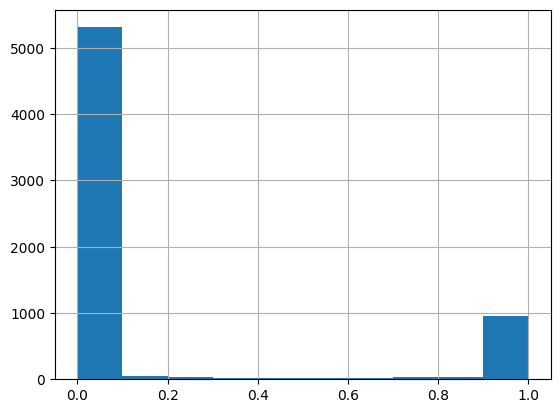

In [21]:
test_set["Predictions"].hist()